In [13]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [14]:
#reading the dataset
df=pd.read_csv(r"E:\datasets\fifa dataset\players_22.csv")

In [15]:
#number of players and number of countries

print("number of attributes in the dataset (columns): ",len(df.axes[1]))
print("number of players in the dataset (rows): ",df[df.columns[0]].count())
print("number of countries: ",df['nationality_name'].nunique())

number of attributes in the dataset (columns):  110
number of players in the dataset (rows):  19239
number of countries:  163


In [16]:
#customization of plots

sns.color_palette('deep')


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [17]:
#number of players from each country

df['nationality_name'].value_counts()

England      1719
Germany      1214
Spain        1086
France        980
Argentina     960
             ... 
Andorra         1
Korea DPR       1
Tanzania        1
Mauritius       1
Estonia         1
Name: nationality_name, Length: 163, dtype: int64

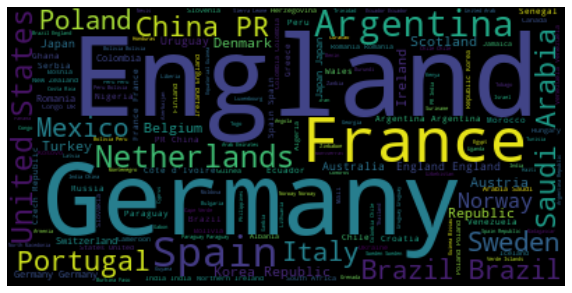

In [18]:
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [19]:
#since there are 163 countries we will visualize only 7 countries
country={'Argentina','Portugal','Brazil','Germany','Spain','France','England','United States','Portugal'}
df_new=df[df['nationality_name'].isin(country)]


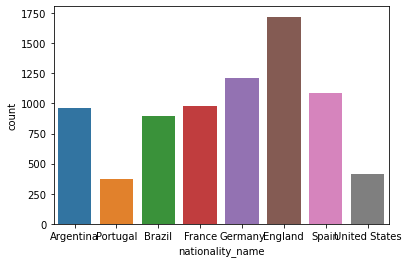

In [20]:
sns.countplot(x='nationality_name',data=df_new)

In [21]:
#finding countries with most number of highest rated players

df_new.groupby("nationality_name")['overall'].mean()

nationality_name
Argentina        68.721875
Brazil           70.851728
England          63.934846
France           67.543878
Germany          65.631796
Portugal         69.726542
Spain            69.563536
United States    63.191283
Name: overall, dtype: float64

In [22]:
#finding number of players produced vs population of each country

c=df_new.groupby("nationality_name")['sofifa_id'].count()
df_pop=[45800000,21400000,56000000,67500000,83100000,10300000,47300000,331900000]
df_pop/c


nationality_name
Argentina         47708.333333
Brazil            23857.302118
England           32577.079697
France            68877.551020
Germany           68451.400329
Portugal          27613.941019
Spain             43554.327808
United States    803631.961259
Name: sofifa_id, dtype: float64

In [23]:
#finding which foot most players prefer

df_new.groupby('preferred_foot')['sofifa_id'].count()

preferred_foot
Left     1889
Right    5753
Name: sofifa_id, dtype: int64

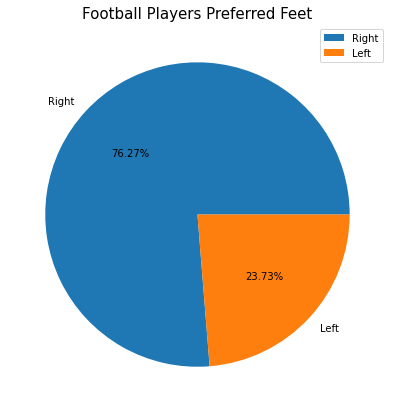

In [24]:
preferred_foot_labels = df["preferred_foot"].value_counts().index 
preferred_foot_values = df["preferred_foot"].value_counts().values

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

<BarContainer object of 3 artists>

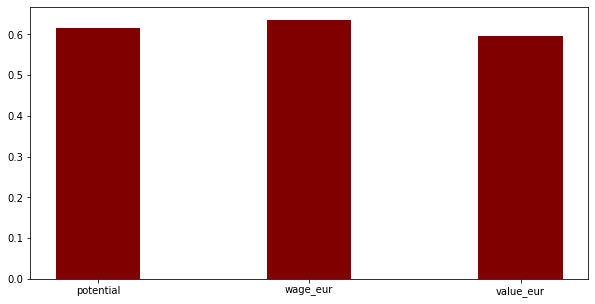

In [25]:
#finding which attribute contibutes the most to 'overall'
df_corr=pd.DataFrame(df_new.corr()['overall'])
l=['potential','wage_eur','value_eur']
df_cor=pd.DataFrame(df_corr.loc[l])
plt.figure(figsize=(10,5))
plt.bar(df_cor.index, df_cor['overall'], color ='maroon',width = 0.4)


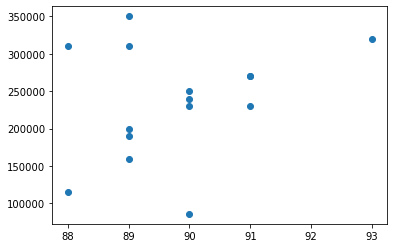

In [26]:

top15=df_new.nlargest(15,'overall')
plt.scatter(top15['overall'],top15['wage_eur'])

In [27]:
dff=pd.DataFrame(df_new.groupby('club_name')['overall'].mean())
dff.sort_values(by=['overall'])

,overall
club_name,
Deportivo Cali,55.000000
Shamrock Rovers,55.000000
Waterford FC,55.833333
Kristiansund BK,57.000000
AZ Alkmaar,58.000000
...,...
US Salernitana 1919,79.000000
Manchester United,79.782609
Atalanta,80.333333


In [28]:
#league with highest average overall players
dff=pd.DataFrame(df_new.groupby('league_name')['overall'].mean())
dff.sort_values(by=['overall'])

,overall
league_name,
Rep. Ireland Airtricity League,57.857143
English League Two,60.110870
English National League,60.619048
German 3. Bundesliga,62.013015
English League One,62.433333
Norwegian Eliteserien,62.571429
Swedish Allsvenskan,63.200000
Finnish Veikkausliiga,63.500000
French Ligue 2,63.728022


In [29]:
df_new['top_defenders']=(df['defending_marking_awareness']+df['defending_standing_tackle']+df['defending_sliding_tackle'])/3
df_new['top_defenders']
a=pd.DataFrame(df_new.groupby('short_name')['top_defenders'].mean())
a

<ipython-input-29-589381f6790b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['top_defenders']=(df['defending_marking_awareness']+df['defending_standing_tackle']+df['defending_sliding_tackle'])/3


,top_defenders
short_name,
A. Adli,34.666667
A. Aguerre,15.333333
A. Aguirre,63.833333
A. Aidonis,62.000000
A. Akinfenwa,32.000000
...,...
Óscar Sielva,67.000000
Óscar Valentín,70.333333
Óscar Whalley,19.000000


In [30]:
#finding the country with the best defenders
v=pd.DataFrame(df_new.groupby('nationality_name')['top_defenders'].mean())
v

,top_defenders
nationality_name,
Argentina,48.212847
Brazil,49.085470
England,46.835757
France,49.197619
Germany,45.849808
Portugal,50.058088
Spain,49.667894
United States,43.551251


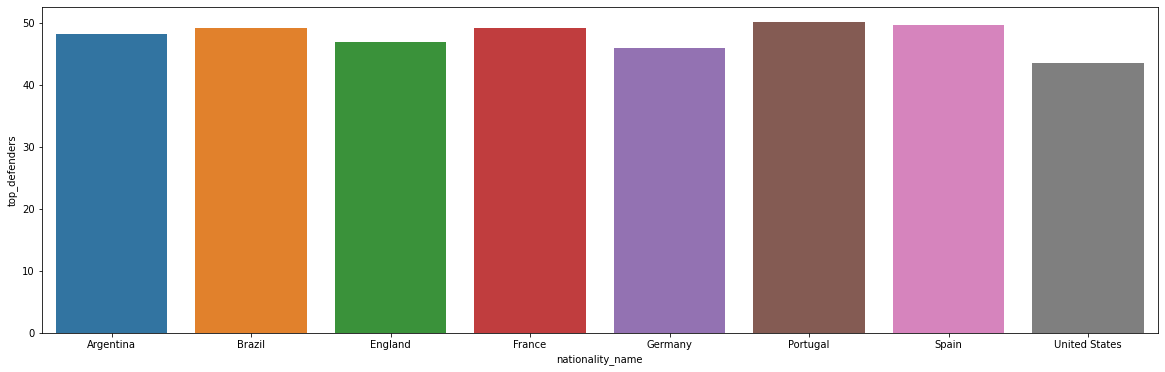

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(x=v.index,y='top_defenders',data=v)

In [32]:
#player with the best physic
l=[]
for i,j in zip(df_new['height_cm'],df_new['weight_kg']):
    if i>175 and i<180 and j>70 and j<80:
        l.append((i+j)/2)
    else:
        l.append(0)


In [33]:
df_new['physic']=l

<ipython-input-33-f29c61b601af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['physic']=l


In [34]:
df_new[df_new['physic']!=0]['physic']

19       126.0
41       126.0
60       126.5
82       125.5
83       124.5
         ...  
18827    126.0
18830    126.5
18850    127.5
18886    123.5
19152    125.0
Name: physic, Length: 740, dtype: float64

In [35]:
df_new['goalkeeping_speed']

0         NaN
2         NaN
3         NaN
6         NaN
7        56.0
         ... 
19169     NaN
19174     NaN
19183    20.0
19197     NaN
19216    33.0
Name: goalkeeping_speed, Length: 7642, dtype: float64

In [36]:
a=(df['goalkeeping_diving']+df['goalkeeping_handling']+df['goalkeeping_kicking']+df['goalkeeping_positioning']+df['goalkeeping_reflexes'])/5
df_new["goalkeeping_speed"].fillna( a, inplace = True)
df_new['goalkeeping_speed']

C:\Users\Sagar\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0        10.8
2        11.6
3        11.8
6         8.4
7        56.0
         ... 
19169     9.6
19174    10.2
19183    20.0
19197     8.8
19216    33.0
Name: goalkeeping_speed, Length: 7642, dtype: float64

In [37]:
df_new['best_gk']=(df['goalkeeping_diving']+df['goalkeeping_handling']+df['goalkeeping_kicking']+df['goalkeeping_positioning']+df['goalkeeping_reflexes']+df_new['goalkeeping_speed'])/6
df_new.sort_values(by=['best_gk'],ascending=False)

<ipython-input-37-a089149d9798>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['best_gk']=(df['goalkeeping_diving']+df['goalkeeping_handling']+df['goalkeeping_kicking']+df['goalkeeping_positioning']+df['goalkeeping_reflexes']+df_new['goalkeeping_speed'])/6


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,top_defenders,best_gk
18,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,GK,89,91,94000000.0,200000.0,27,...,35+3,36+3,87+3,https://cdn.sofifa.net/players/210/257/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png,17.333333,83.666667
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,12.666667,83.333333
20,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,GK,89,90,82000000.0,190000.0,28,...,31+3,30+3,87+3,https://cdn.sofifa.net/players/212/831/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png,16.666667,81.166667
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png,16.000000,80.333333
113,202811,https://sofifa.com/player/202811/emiliano-mart...,E. Martínez,Damián Emiliano Martínez,GK,84,85,33500000.0,81000.0,28,...,32+3,33+3,83+2,https://cdn.sofifa.net/players/202/811/22_120.png,https://cdn.sofifa.net/teams/2/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,17.000000,79.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,213345,https://sofifa.com/player/213345/kingsley-coma...,K. Coman,Kingsley Junior Coman,"LM, RM, LW",86,87,81000000.0,120000.0,25,...,45+3,56+3,13+3,https://cdn.sofifa.net/players/213/345/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png,25.666667,4.200000
3139,183280,https://sofifa.com/player/183280/adil-rami/220002,A. Rami,Adil Rami,CB,72,72,625000.0,9000.0,35,...,72,62+3,11+3,https://cdn.sofifa.net/players/183/280/22_120.png,https://cdn.sofifa.net/teams/294/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/fr.png,71.000000,4.200000
5589,195838,https://sofifa.com/player/195838/rafael-schule...,Crivellaro,Rafael Schuler Crivellaro,CAM,69,69,1100000.0,1000.0,32,...,53+2,57+2,11+2,https://cdn.sofifa.net/players/195/838/22_120.png,https://cdn.sofifa.net/teams/113297/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/br.png,42.000000,4.000000
37,195864,https://sofifa.com/player/195864/paul-pogba/22...,P. Pogba,Paul Pogba,"CM, LM",87,87,79500000.0,220000.0,28,...,72+3,72+3,13+3,https://cdn.sofifa.net/players/195/864/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png,63.000000,4.000000


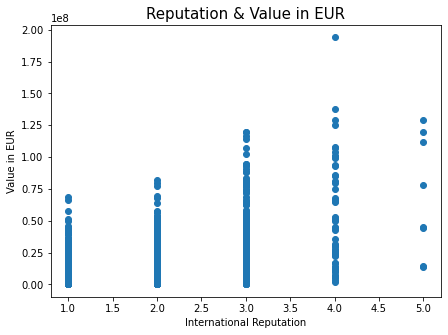

In [38]:
# Let's plot the relationship between player reputation and value


fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['international_reputation'], y=df['value_eur'] )
plt.xlabel("International Reputation") 
plt.ylabel("Value in EUR")
plt.title("Reputation & Value in EUR", fontsize = 15)

plt.show()

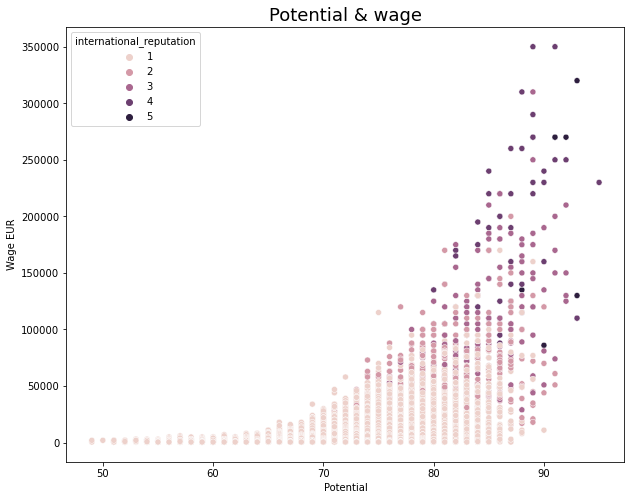

In [39]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

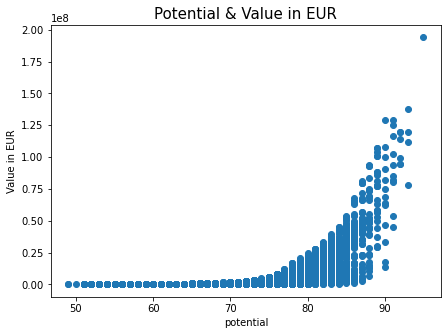

In [40]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("potential") 
plt.ylabel("Value in EUR")
plt.title("Potential & Value in EUR", fontsize = 15)
plt.show()

C:\Users\Sagar\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sagar\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


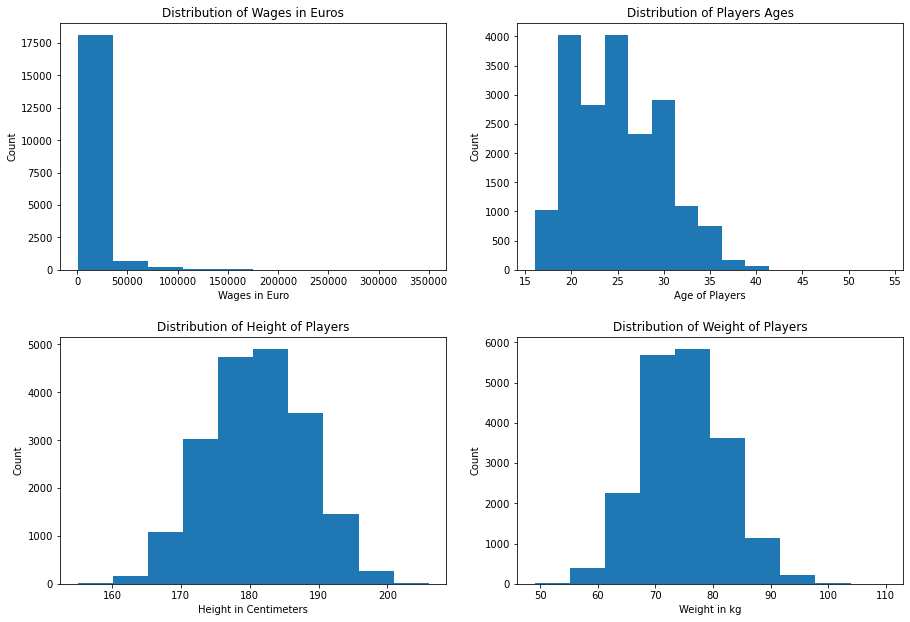

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(df['age'], bins = 15)
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')

# first two is using a matplotlib syntax, the next two I'll do with seaborn 

#axes[1,0].set_title('Distribution of Height of Players')
#sns.histplot(df, x='height_cm', ax=axes[1,0], kde=True)
#axes[1,0].set_xlabel('Height in Centimeters')
#axes[1,0].set_ylabel('Count')


#axes[1,1].set_title('Distribution of Weight of Players')
#sns.histplot(df, x='weight_kg', ax=axes[1,1], kde=True)
#axes[1,1].set_xlabel('Weight in kg')
#axes[1,1].set_ylabel('Count')


axes[1,0].set_title('Distribution of Height of Players')
axes[1,0].hist(df['height_cm'])
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')

axes[1,1].set_title('Distribution of Weight of Players')
axes[1,1].hist(df['weight_kg'])
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')

plt.tight_layout(pad=2)
plt.show()

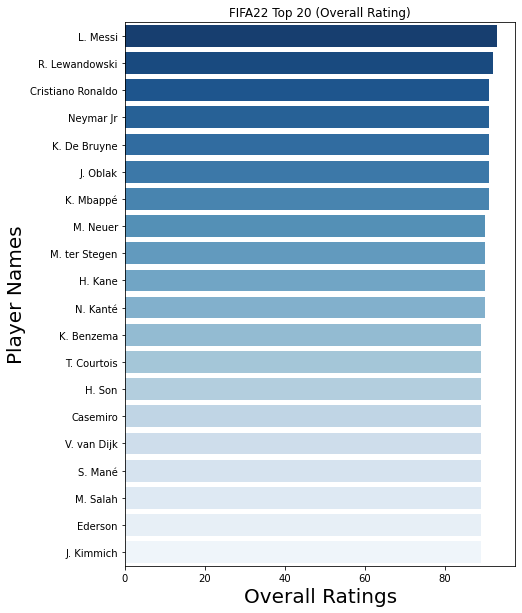

In [42]:
#top 10 players 

Overall = df["overall"]
footballer_name = df["short_name"]

# Let's create dataframe(Name,Overall)
data = pd.DataFrame({'short_name': footballer_name,'overall':Overall})

x = df['short_name'].head(20) 
y = df['overall'].head(20)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 20) 
plt.ylabel('Player Names', size = 20 ) 
plt.title('FIFA22 Top 20 (Overall Rating)')

plt.show()

In [43]:
#top 10 players by wages
player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

,wage_eur,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,
K. De Bruyne,350000.0,125500000.0,91,30,Belgium,91,4
K. Benzema,350000.0,66000000.0,89,33,France,89,4
L. Messi,320000.0,78000000.0,93,34,Argentina,93,5
Casemiro,310000.0,88000000.0,89,29,Brazil,89,3
T. Kroos,310000.0,75000000.0,88,31,Germany,88,4
R. Sterling,290000.0,107500000.0,88,26,England,89,4
R. Lewandowski,270000.0,119500000.0,92,32,Poland,92,5
Cristiano Ronaldo,270000.0,45000000.0,91,36,Portugal,91,5
Neymar Jr,270000.0,129000000.0,91,29,Brazil,91,5


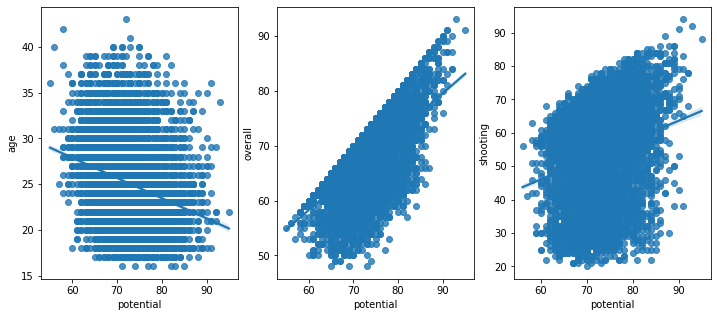

In [44]:
# Scater plot shows correlation between potential and other chosen features
def scatter_plot(df):
    feats = ('age', 'overall', 'shooting')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/3+1, 3, index+1)
        ax = sns.regplot(x = 'potential', y = feat, data = df_new)

plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4)

scatter_plot(data)
